# Explanation of program


This notebook contains a walkthrough example of how to use the code.

Please read all the instructions before running
All files must be in same folder in order to work (note this folder is where exported data will also go)

## Importing all packages

In [10]:
import os
import sys
import copy
import pandas as pd

from AdsorptionBreakthroughAnalysis import *
from AdsorptionBreakthroughAnalysis.breakthrough_analysis import standard_output

%load_ext autoreload
%autoreload 2

# below is just to make the output clearer
pd.options.mode.chained_assignment = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Step 1. Input data

When the program performs analysis on the data it needs to know the setup and conditions of the data.

So for each data set the program analyses it needs to know these initial conitions 

An example of setting up a sample and blank is shown below:

The example used is the 22% CO2 ZIF-8 experiment

First we will produce the blank data

This experiment was run at 40°C, adsorption start was 0 hours 45 minutes and 30 seconds, adsorption end was 1 hours 4 minutes and 30 seconds and the coriolis start was at 70 seconds. The flow of CO2 was above 2.0mL/min so we will put LowConcCO2 as False. So we will enter these values into 'ExperimentalSetup' and 'ExperimentalSetup' will then be inputted to the program as our setup conditions

We also need to include the file names 


Running the below cell will produce an 'Object' that contains all of your data

This cell should print below the required RS values and time locations for excel manipulation

Object is python lingo -- this notebook will show you how to access and manipulate the data 

In [11]:
ExperimentalSetup["breakthrough_start"] = 3600 * 0 + 60 * 45 + 30
ExperimentalSetup["breakthrough_end"] = 3600 * 1 + 60 * 4 + 30
ExperimentalSetup["LowConcCo2"] = False
ExperimentalSetup["Coriolis_start"] = 70
coriolis_file_name = "220819-ZIF-8-dry-22%and60%40C20220819134938.txt"
MS_file_name = "220819ZIF8Blank22and60%CO2at40C.csv"

experiment_22perc_ZIF8_blank = experiment_analysis(
    coriolis_file_name=coriolis_file_name,
    MS_file_name=MS_file_name,
    conditions=copy.deepcopy(ExperimentalSetup),
)

## Next we will produce the sample data

All data is contained in objects. We can make these objects do different things

 The sample was run at 40°C, adsorption start was 4 hours and 42 minutes and 5 seconds, adsorption end was 5 hours 7 minutes and 30 seconds and the coriolis start was at 14 seconds.

In [12]:
ExperimentalSetup["T_exp"] = 313
ExperimentalSetup["breakthrough_start"] = 3600 * 5 + 60 * 1 + 40
ExperimentalSetup["breakthrough_end"] = 3600 * 5 + 60 * 23 + 10
ExperimentalSetup["LowConcCo2"] = False
ExperimentalSetup["Coriolis_start"] = 30
coriolis_file_name = "220824-ZIF-8-4and22%at40C.txt"
MS_file_name = "220824-ZIF-8-4and22%at40C.csv"

experiment_22perc_ZIF8 = experiment_analysis(
    coriolis_file_name=coriolis_file_name,
    MS_file_name=MS_file_name,
    conditions=copy.deepcopy(ExperimentalSetup),
)

 Now we have the data from both the experiment and the sample we can extract some information

 Calling the function standard result will give us the standard results:

Breakthrough curve of ytQT/tiQin form 
  plots of sample, blank and both
CO2 adsorbed for sample and blank 
Capture capacity of material for these conditions
Selectivity
Exports data as a csv file
  This file will apear in the same folder
You will specify the name of the desired file

export_file_name is the file name for the exported sample and blank processed results -- blank file will have blank infront of it so leave sample/ blank out of the name

material_name will be the name of the material displayed in the title of the graphs

whether to export determines if the files will be exported or not. Set whether_to_export = True if you wish the files to be exported and =False if you don't wish the data to be exported as csv files 

C:\Users\ffm2000\Dropbox (Heriot-Watt University Team)\RCCS_Capture_Fergus Mcilwaine\Projects\Daniel_exp_data\AdsorptionBreakthroughAnalysis\src\AdsorptionBreakthroughAnalysis\breakthrough_analysis.py:1049: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Volumetric flow in [m3/s]"] = pd.Series(
C:\Users\ffm2000\Dropbox (Heriot-Watt University Team)\RCCS_Capture_Fergus Mcilwaine\Projects\Daniel_exp_data\AdsorptionBreakthroughAnalysis\src\AdsorptionBreakthroughAnalysis\breakthrough_analysis.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

Below are the CO2 adsorptions for blank and sample: 
CO2 adsorbed by the blank was:  1.1637918889371581  mmol/g
CO2 adsorbed by the sample was:  1.6648259850700993  mmol/g

This gives a capture capacity of:  0.5010340961329411  mmol/g

Selectivity (x_CO2 * y_CO2 / x_N2 * y_N2) of:  0.32


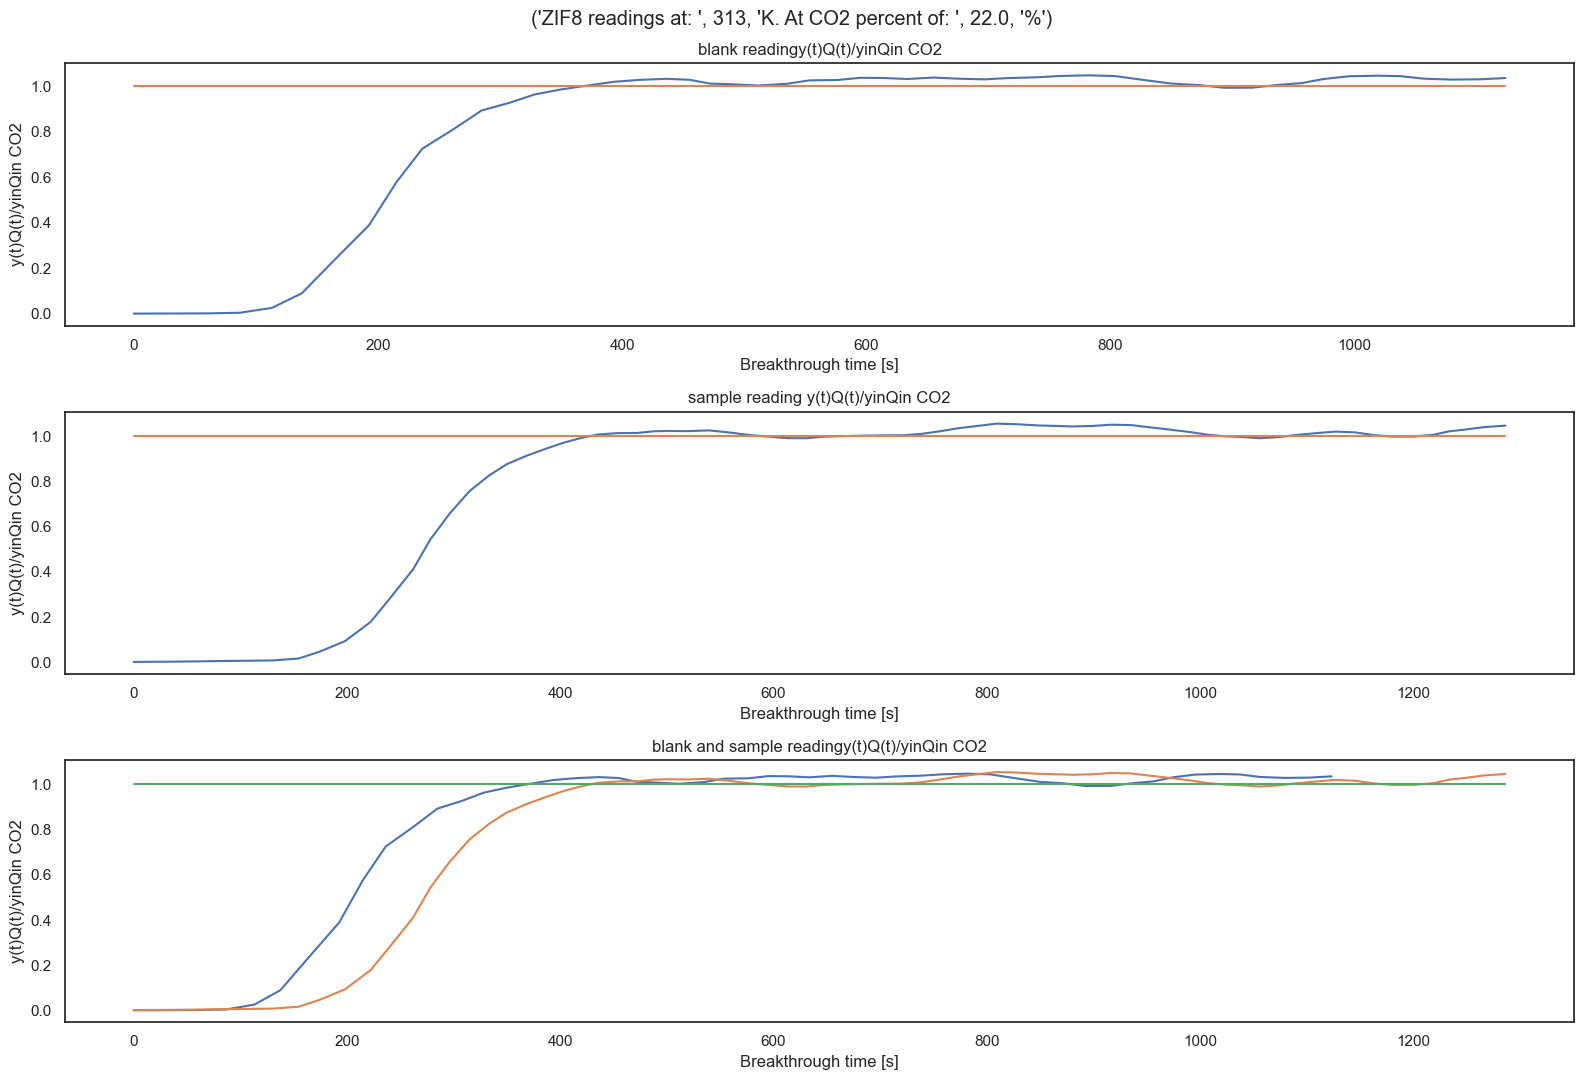

In [17]:
material_name = "ZIF8"
export_file_name = "processed_22%_CO2_dry_ZIF8"
whether_to_export = False  # this is equal to false as I dont want the processed data to be exported

standard_output(
    sample_object=experiment_22perc_ZIF8,
    blank_object=experiment_22perc_ZIF8_blank,
    export_file_name=export_file_name,
    material_name=material_name,
    whether_to_export=whether_to_export,
)

# You now should have all standard results for the experiment

 (capture capacities etc are all printed above the graph)

 keep reading if you want extra info on the program - otherwise for standard use everything is described above 

 First looking at the rest of the function standard_output 
# The 3 additional arguments are "y_axis", "width" and "height"

y_axis defines what will be plotted on the y axis and by default is the IAS standard result

width and height simply control the desired width and height of the graphs by default these are 16 and 11

C:\Users\ffm2000\Dropbox (Heriot-Watt University Team)\RCCS_Capture_Fergus Mcilwaine\Projects\Daniel_exp_data\AdsorptionBreakthroughAnalysis\src\AdsorptionBreakthroughAnalysis\breakthrough_analysis.py:1049: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Volumetric flow in [m3/s]"] = pd.Series(
C:\Users\ffm2000\Dropbox (Heriot-Watt University Team)\RCCS_Capture_Fergus Mcilwaine\Projects\Daniel_exp_data\AdsorptionBreakthroughAnalysis\src\AdsorptionBreakthroughAnalysis\breakthrough_analysis.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

Below are the CO2 adsorptions for blank and sample: 
CO2 adsorbed by the blank was:  1.1637918889371581  mmol/g
CO2 adsorbed by the sample was:  1.6648259850700993  mmol/g

This gives a capture capacity of:  0.5010340961329411  mmol/g

Selectivity (x_CO2 * y_CO2 / x_N2 * y_N2) of:  0.32


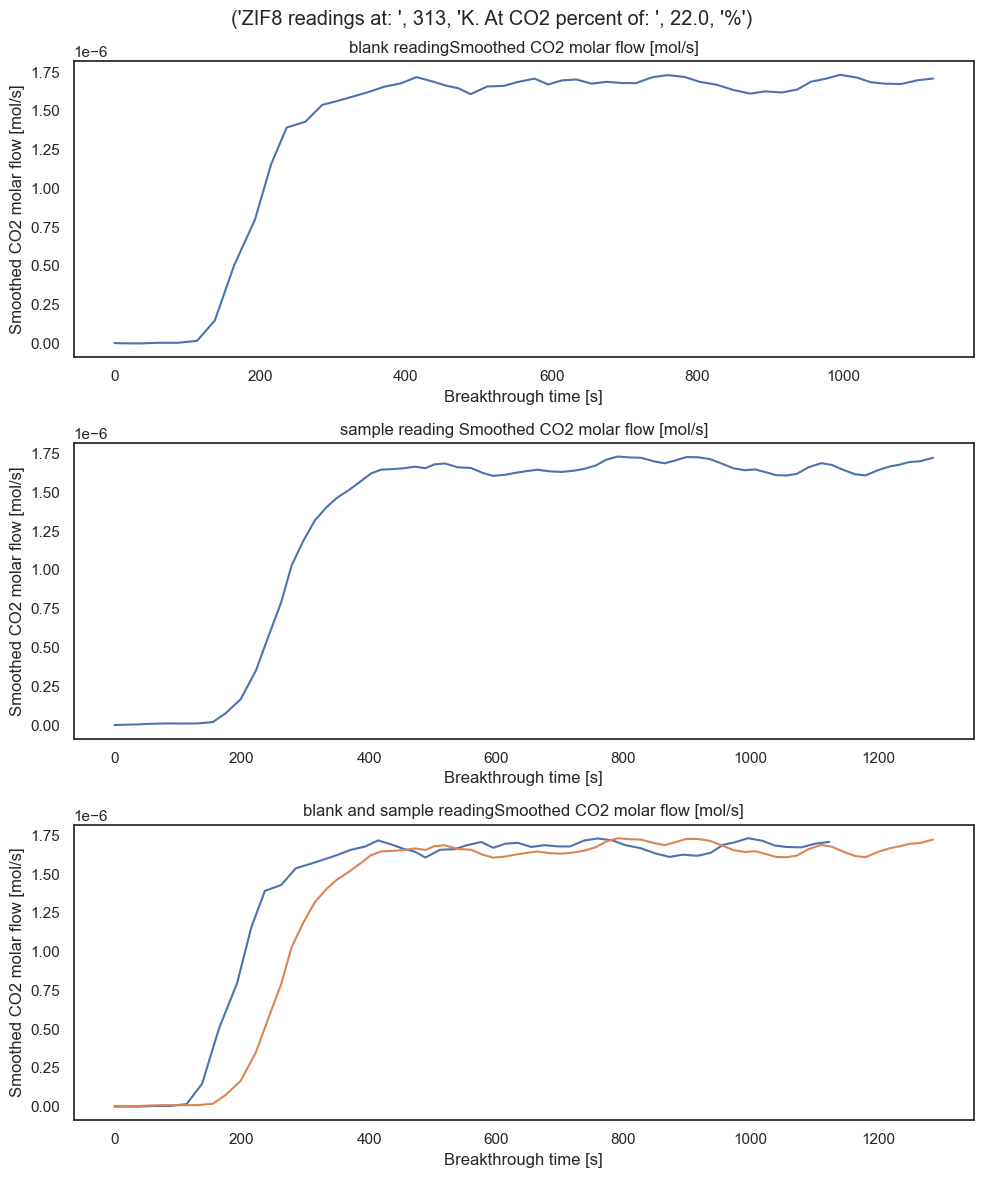

In [18]:
standard_output(
    y_axis="Smoothed CO2 molar flow [mol/s]",
    width=10,
    height=12,
    sample_object=experiment_22perc_ZIF8,
    blank_object=experiment_22perc_ZIF8_blank,
    export_file_name=export_file_name,
    material_name=material_name,
    whether_to_export=whether_to_export,
)

## Now looking at some of the ways to call the data from the objects

All the data is stored in pandas dataframes and so can be called as such

The way to call the dataframe held within the object is shown below

In [19]:
experiment_22perc_ZIF8.sorted_data

,H2O pressure [torr],CO2 pressure [torr],O2 pressure [torr],He pressure [torr],N2 pressure [torr],Unnamed: 7,Time [s],Interpolated CO2 flow [%],Interpolated N2 flow [%],Interpolated He flow [%],...,Smoothed Normalised N2 concentration [mol/m3],Smoothed Normalised He concentration [mol/m3],Smoothed Normalised H2O concentration [mol/m3],Q(t),yinQin CO2,y(t) CO2,y(t)Q(t)/yinQin CO2,yinQin N2,y(t) N2,y(t)Q(t)/yinQin N2
0,-4.444540e-12,-8.997790e-13,7.221030e-12,1.215490e-07,4.198990e-13,NaN,18100.000,2.196875,7.798500,14.18125,...,0.000000,0,0,22.816268,2.198796,0.000236,0.001434,7.795014,0.000000,0.000000
1,8.594430e-13,2.509920e-12,-4.342900e-12,1.213130e-07,2.033190e-12,NaN,18110.692,2.203125,7.800063,14.18437,...,0.000000,0,0,5.834410,2.198796,0.000159,0.001834,7.794217,0.000000,0.000000
2,-8.152330e-12,1.120780e-12,-2.980920e-12,1.216290e-07,8.331600e-12,NaN,18134.668,2.203125,7.796875,14.18125,...,0.000000,0,0,12.998894,2.199577,0.000342,0.002567,7.793124,0.000000,0.000000
3,3.437770e-12,3.709640e-12,-3.726150e-12,1.217070e-07,-6.210090e-12,NaN,18156.542,2.200000,7.794125,14.18437,...,0.000000,0,0,19.579295,2.201139,0.000604,0.003646,7.791937,0.000000,0.000000
4,-7.121100e-13,5.114560e-12,-3.931730e-12,1.211160e-07,-8.839990e-13,NaN,18180.518,2.203125,7.793750,14.18125,...,0.000000,0,0,24.142529,2.200358,0.000616,0.005361,7.791328,0.000000,0.000106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,4.174430e-13,5.457430e-10,-3.597660e-13,1.275880e-07,1.964130e-08,NaN,19319.168,2.206250,7.802250,14.18125,...,0.344100,0,0,30.986860,2.199702,0.072125,1.005691,7.793702,0.268359,1.071619
67,-1.080430e-12,5.182760e-10,1.798830e-12,1.273110e-07,1.973520e-08,NaN,19333.360,2.199375,7.796875,14.18125,...,0.344010,0,0,31.146543,2.198984,0.072682,1.020611,7.794139,0.268311,1.068970
68,4.174430e-12,5.311100e-10,4.368590e-12,1.273510e-07,1.982360e-08,NaN,19349.656,2.197250,7.798625,14.18125,...,0.344075,0,0,30.989820,2.198734,0.073629,1.029104,7.795170,0.268376,1.065801
69,8.422440e-12,5.504630e-10,6.578590e-12,1.266410e-07,1.977940e-08,NaN,19365.952,2.196875,7.800000,14.18125,...,0.343658,0,0,30.729986,2.196391,0.073845,1.039240,7.793827,0.268103,1.064351


The loading data however is held in a tuple of lists with one list being th emass based loading and the other the volume based loading.

Please note I couldn't quite get the volume based loading to work so mass based for N2 and CO2 is most accurate

In [20]:
experiment_22perc_ZIF8.loading_data

(['Mass based loading (mg/g sample)',
  {'CO2': 1.6648259850700993,
   'N2': 3.963123516603717,
   'He': -69.77251953296631,
   'H2O': 0.0}],
 ['Volume based loading (mmol/g sample)',
  {'CO2': 63.3674158292646, 'N2': 192.9045162433856, 'He': -0.0, 'H2O': -0.0}])

The calculate_loading method within the class by default calculates until 1100s
This can be changed however by recalling the calculate_loading method and specifiying till when to calculate -- usefull when there is large noise at the tail end of the data

In [23]:
experiment_22perc_ZIF8.calculate_loading(integration_end=480)

C:\Users\ffm2000\Dropbox (Heriot-Watt University Team)\RCCS_Capture_Fergus Mcilwaine\Projects\Daniel_exp_data\AdsorptionBreakthroughAnalysis\src\AdsorptionBreakthroughAnalysis\breakthrough_analysis.py:1049: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Volumetric flow in [m3/s]"] = pd.Series(
C:\Users\ffm2000\Dropbox (Heriot-Watt University Team)\RCCS_Capture_Fergus Mcilwaine\Projects\Daniel_exp_data\AdsorptionBreakthroughAnalysis\src\AdsorptionBreakthroughAnalysis\breakthrough_analysis.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

(['Mass based loading (mg/g sample)',
  {'CO2': 1.7405661938855128,
   'N2': 4.968874310660447,
   'He': -32.05470559625478,
   'H2O': 0.0}],
 ['Volume based loading (mmol/g sample)',
  {'CO2': 63.847338865123255,
   'N2': 189.14833173448133,
   'He': -0.0,
   'H2O': -0.0}])

The plot method can also be useful to produce a graph of multiple columns as it can take in lists as an argument

(note since it is a method acting on one object then only blank or sample data can be plotted)

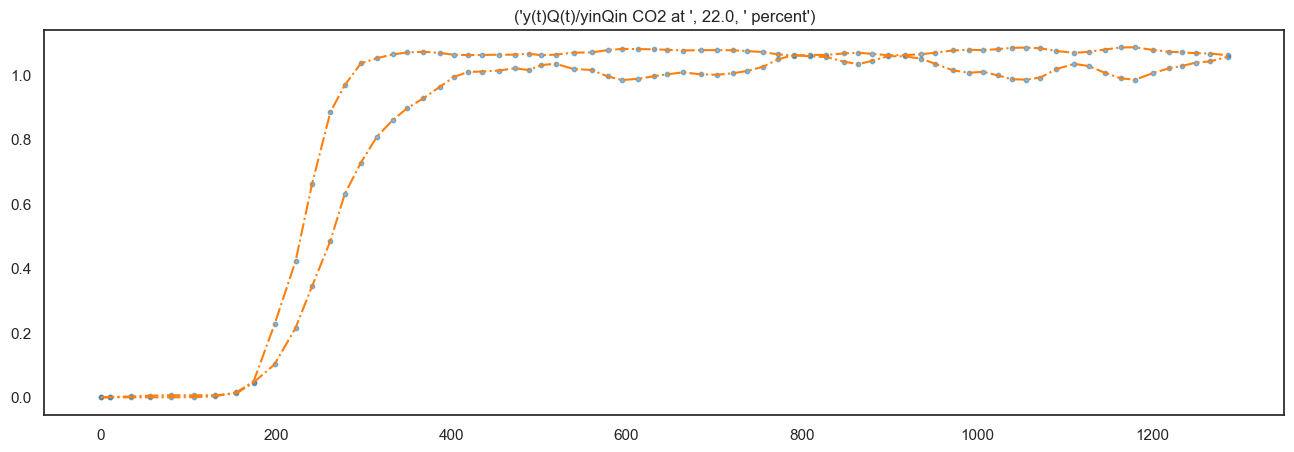

In [25]:
experiment_22perc_ZIF8.plot(
    Columns_plotted=[
        "Smoothed Normalised CO2 molar flow [mol/s]",
        "Smoothed Normalised N2 molar flow [mol/s]",
    ]
)

Finally the export_data method can also be called to simply export the data to a csv

Note this has been hashed so as to not cause confusion by a file being produced from possibly nowhere 

In [26]:
# experiment_22perc_ZIF8.export_data(fileName='processed_22%CO2_ZIF8_sample')

There are some different values in the ExperimentalSetup that deserve a slight bit more explanation

bed mass is the mass of sample loaded into the bed and so must be chnaged depending on the amount of sample loaded

filter_window chooses how many points to filter with when smooth - choose a higher value for greater smoothing -- however this can destroy the curve somewhat

smoothing start is when the filter will be applied for each compound 

In [27]:
print(ExperimentalSetup["bed_mass"])
print(ExperimentalSetup["filter_window"])
print(ExperimentalSetup["smoothing_start"])

0.00025
4
{'CO2': 0, 'H2O': 0, 'N2': 0, 'He': 0}
